In [1]:
#load all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

C:\Users\eugen\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\eugen\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#loading the dataset for analysis
run_walk_data = pd.read_csv("run_or_walk.csv")
#displaying all features
pd.options.display.max_rows = None
pd.options.display.max_columns = None
#displaying the loaded dataset
run_walk_data.head(50)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,2017-6-30,13:51:17:46806991,viktor,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,2017-6-30,13:51:17:246767997,viktor,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473
7,2017-6-30,13:51:17:446569025,viktor,0,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348
8,2017-6-30,13:51:17:646152973,viktor,0,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759
9,2017-6-30,13:51:17:846502006,viktor,0,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982


EXPLORATORY DATA ANALYSIS PHASE

In [3]:
#creating a copy of the dataset and obtaining the dataset info
df = run_walk_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [4]:
#checking for missing values
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [5]:
#obtaining the descriptive statistics of our nummerical features
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


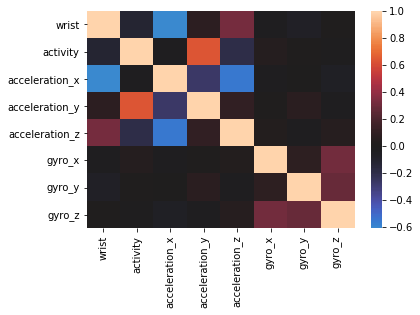

In [10]:
#visualizing a heatmap of the features to uncover any relationships
#first computing the correlation between variables
corr = df.corr()
sns.heatmap(corr, center = 0)

In [37]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

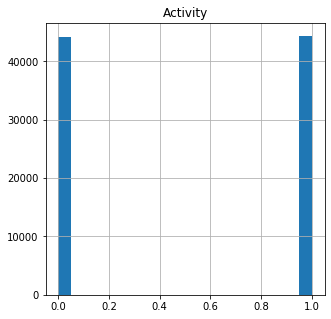

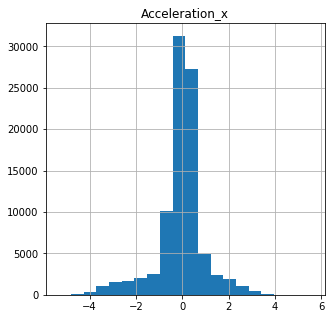

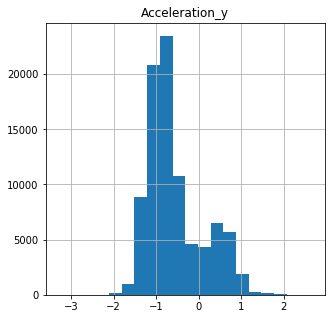

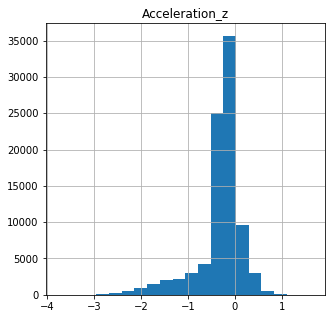

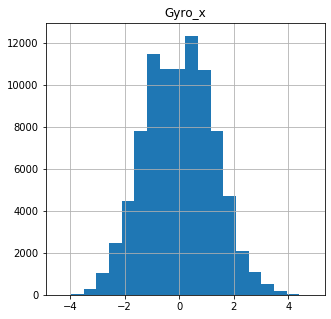

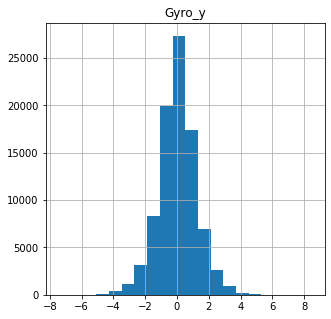

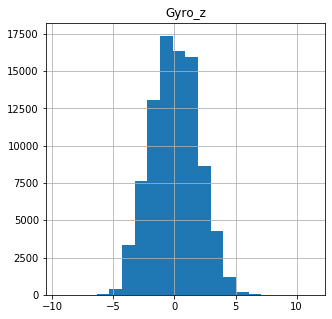

In [43]:
#detecting outliers using histogram; as any outlier can affect the accuracy of our model
plt.figure(figsize = (5,5))
df['activity'].hist(bins = 20)
plt.title('Activity')
plt.show

plt.figure(figsize = (5,5))
df['acceleration_x'].hist(bins = 20)
plt.title('Acceleration_x')
plt.show

plt.figure(figsize = (5,5))
df['acceleration_y'].hist(bins = 20)
plt.title('Acceleration_y')
plt.show

plt.figure(figsize = (5,5))
df['acceleration_z'].hist(bins = 20)
plt.title('Acceleration_z')
plt.show

plt.figure(figsize = (5,5))
df['gyro_x'].hist(bins = 20)
plt.title('Gyro_x')
plt.show

plt.figure(figsize = (5,5))
df['gyro_y'].hist(bins = 20)
plt.title('Gyro_y')
plt.show

plt.figure(figsize = (5,5))
df['gyro_z'].hist(bins = 20)
plt.title('Gyro_z')
plt.show

DATA MODELLING AND VALIDATION

In [18]:
#creating our target and label variables
labels = df.iloc[:, 5:]
Target = df.iloc[:, 4]
#splitting data into train(80) and test data(20)
x_train, x_test, y_train, y_test = train_test_split(labels, Target, test_size = 0.2, random_state = 12)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70870, 6), (17718, 6), (70870,), (17718,))

In [19]:
#creating object instance of our class GaussianNB
gauss = GaussianNB()
#fitting model
gauss.fit(x_train, y_train)
#predicting values for target 
y_pred = gauss.predict(x_test)
#computing accuracy score of our model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9573879670391692


In [20]:
#creating our confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[8762  681]
 [  74 8201]]


In [21]:
#retrieving the classification report
from sklearn.metrics import classification_report
names = ['walk', 'run']
print(classification_report(y_test, y_pred, target_names = names))

              precision    recall  f1-score   support

        walk       0.93      0.99      0.96      8836
         run       0.99      0.92      0.96      8882

    accuracy                           0.96     17718
   macro avg       0.96      0.96      0.96     17718
weighted avg       0.96      0.96      0.96     17718



In [22]:
#checking with fewer labels to see if we can have a higher accuracy score. This will of course narrow down the features
#responsible for predicting walk or run movement
labels1 = df.iloc[:, [5,6,7]]
Target1 = df.iloc[:, 4]
#splitting data into train(80) and test data(20)
x_train, x_test, y_train, y_test = train_test_split(labels1, Target1, test_size = 0.2, random_state = 12)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70870, 3), (17718, 3), (70870,), (17718,))

In [23]:
#creating object instance of our class GaussianNB
gauss = GaussianNB()
#fitting model
gauss.fit(x_train, y_train)
#predicting values for target 
y_pred = gauss.predict(x_test)
#computing accuracy score of our model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9582345637205102


Conclusion: There is little or no significant difference!